# Problem Komiwojażera przy pomocy Algorytmów Genetycznych
## By Szymon Skrzypczyk ;)

In [51]:
from typing import Literal
from random import randint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
  # beda jako parametry
# rozmiary 
# ilosc punktow n
# warunek koncowy
n = 50
selected_items = 25
distance_threshold = 100
POP_SIZE = 500
cross_prob = 0.8
mutation_prob = 0.2
selection_method = "ranking"  # "roulette"

In [53]:
cities = np.random.uniform(0, 300, (n, 2))
# dystans euklidesowski
calc_distance = lambda p1, p2: np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

calc_distance(cities[0], cities[1])

np.float64(176.65905566016036)

## Położenie miast na "mapie"

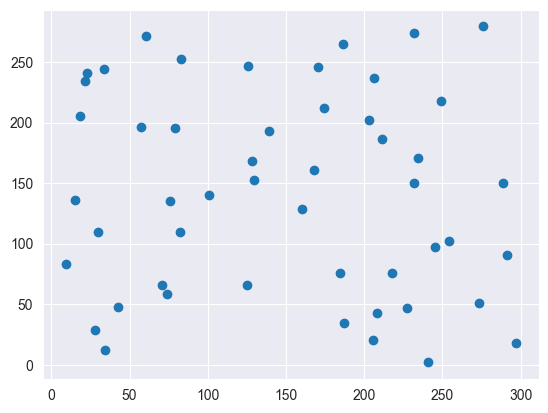

In [54]:
# do poprawy stylownia itd itd
plt.scatter(cities[:, 0], cities[:, 1])

## macierz dystansow miedzy miastami

In [55]:
# tablica odleglosci 
distances = []
for nx in range(n):
    distances_nx = []
    for mx in range(n):
        if mx == nx:
            distances_nx.append(np.nan)
        distances_nx.append(calc_distance(cities[nx], cities[mx]))
                            
    distances.append(distances_nx)

distances = pd.DataFrame(distances)
distances

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,NaN,0.000000,176.659056,241.500673,194.890822,293.103737,121.910912,150.945059,209.335749,157.782399,...,122.531468,221.632638,227.078146,206.362360,162.796443,169.814838,227.719795,63.925065,295.580831,287.665875
1,176.659056,NaN,0.000000,67.078547,154.227507,129.975280,156.318074,164.059987,51.795506,33.224152,...,116.464525,128.733311,50.543610,145.365381,158.148609,43.273365,54.724102,135.687797,192.522802,121.383371
2,241.500673,67.078547,NaN,0.000000,200.823301,103.226728,218.955647,222.348091,73.010788,85.188621,...,179.091666,124.183966,27.672881,153.090102,213.664772,97.868793,44.656419,194.175014,165.015170,58.282151
3,194.890822,154.227507,200.823301,NaN,0.000000,171.363141,78.837227,54.426338,128.165232,174.398170,...,75.288452,280.055371,173.247584,289.967118,38.098371,110.993622,158.274245,205.498227,346.703771,258.468661
4,293.103737,129.975280,103.226728,171.363141,NaN,0.000000,224.671206,214.540131,84.508973,162.141509,...,191.349434,227.245595,89.845672,254.934524,200.358283,123.299120,76.820420,262.965337,263.926797,136.095615
5,121.910912,156.318074,218.955647,78.837227,224.671206,NaN,0.000000,29.046649,156.312617,161.624511,...,39.966758,262.702705,194.353957,263.217264,42.352118,121.532488,185.088272,148.487207,336.056909,276.319177
6,150.945059,164.059987,222.348091,54.426338,214.540131,29.046649,NaN,0.000000,154.613470,174.693604,...,52.061079,278.772409,196.223846,282.211945,16.382211,124.791282,184.660243,174.899823,350.501144,280.519967
7,209.335749,51.795506,73.010788,128.165232,84.508973,156.312617,154.613470,NaN,0.000000,84.896429,...,118.246080,173.892166,45.337916,194.381768,144.110859,40.163938,30.438748,178.976965,229.757423,130.309602
8,157.782399,33.224152,85.188621,174.398170,162.141509,161.624511,174.693604,84.896429,NaN,0.000000,...,123.589800,105.867760,77.336100,117.154696,171.701653,67.921224,85.709025,109.166970,175.843334,130.397900
9,228.933673,85.025468,98.423503,112.992975,67.476761,157.877082,149.933424,33.759577,117.771756,NaN,...,123.881074,207.056043,72.067836,228.097722,136.863560,61.593294,53.959831,205.488774,260.453849,151.986669


In [133]:
def calculate_distance_chromosome(chromosome):
    total = 0
    for start_el, next_el in zip(range(n-1), range(1, n)):
        # print(start_el, next_el, distances.iloc[chromosome[start_el], chromosome[next_el]])
        total += distances.iloc[chromosome[start_el], chromosome[next_el]]

    return total

In [143]:
def sort_by_distance(distances_list: np.array, how: Literal["asc", "desc"] = "asc") -> np.array:
    sorted_distances = distances_list.copy()
    distances_with_metrics = np.array([calculate_distance_chromosome(chromosome) for chromosome in sorted_distances])

    if how == "asc":
        sorted_indices = np.argsort(distances_with_metrics)
    elif how == "desc":
        sorted_indices = np.argsort(-distances_with_metrics)
    else:
        raise ValueError("Invalid sort order. Use 'asc' or 'desc'!")

    sorted_distances = distances_list[sorted_indices]
    return sorted_distances


In [144]:
population = np.array([np.random.permutation(distances.index) for _ in range(POP_SIZE)])
metrics = np.array([calculate_distance_chromosome(chromosome) for chromosome in population])

# Add the metric as an extra column to the population array
population_with_metrics = np.hstack((population, metrics.reshape(-1, 1)))

population_with_metrics

array([[6.00000000e+00, 1.50000000e+01, 2.50000000e+01, ...,
        4.10000000e+01, 1.30000000e+01, 8.13452623e+03],
       [2.30000000e+01, 1.80000000e+01, 4.30000000e+01, ...,
        3.80000000e+01, 2.80000000e+01, 7.33416887e+03],
       [4.10000000e+01, 1.90000000e+01, 3.80000000e+01, ...,
        2.90000000e+01, 4.90000000e+01, 7.79827760e+03],
       ...,
       [8.00000000e+00, 2.00000000e+01, 4.10000000e+01, ...,
        3.30000000e+01, 4.70000000e+01, 7.95570118e+03],
       [1.80000000e+01, 2.10000000e+01, 9.00000000e+00, ...,
        0.00000000e+00, 2.90000000e+01, 7.55779913e+03],
       [1.50000000e+01, 4.90000000e+01, 5.00000000e+00, ...,
        2.90000000e+01, 4.10000000e+01, 7.70292043e+03]], shape=(500, 51))

In [136]:
def add_metric_column(pop_chromosome: np.array) -> np.array:
    metrics_row = np.array([calculate_distance_chromosome(chromosome) for chromosome in pop_chromosome])
    # Add the metric as an extra column to the population array
    pop_chromosome_with_metrics = np.hstack((pop_chromosome, metrics_row.reshape(-1, 1)))
    return pop_chromosome_with_metrics

## Operatory genetyczne

In [142]:
def mutate(pop_list):
    pop_el = pop_list.copy()
    # phase 1
    exchange_element_1 = randint(0, n - 1)
    exchange_element_2 = randint(0, n - 1)

    # can't swap the same element, but they will be distinct by definition
    # while exchange_element_2 == exchange_element_1:
    #    exchange_element_2 = randint(0, n)

    pop_el[exchange_element_1], pop_el[exchange_element_2] = pop_el[exchange_element_2], pop_el[exchange_element_1]

    # Phase 2
    exchange_start = randint(0, n - 2)
    exchange_end = randint(exchange_start + 1, n - 1)
    # the index cannot be larger than the actual array
    exchange_end = min(exchange_end, len(pop_el))

    el_start = pop_el[exchange_start]
    pop_el = np.delete(pop_el, exchange_start)
    pop_el = np.insert(pop_el, exchange_end, el_start)


    return pop_el

mutate(population[9])

array([ 7, 42,  0, 16,  4, 40, 48,  1,  6, 19, 34, 12,  9, 27, 11, 31, 15,
       13, 45, 43, 25, 33, 10, 47, 35, 30, 17, 38, 21, 20, 49, 36, 29, 23,
       37,  2, 18, 39, 22, 28, 32,  5, 46,  8, 24,  3, 44, 41, 14, 26])

In [138]:
def crossover(parent1, parent2):
    child = np.full(n, -1) 

    exchange_start = randint(0, n - 1) 
    exchange_end = randint(exchange_start + 1, n)  

    # assign crossover elements
    child[exchange_start:exchange_end] = parent1[exchange_start:exchange_end]

    # genes that have already been added
    added_genes = child[exchange_start:exchange_end]
    # position of next entry
    child_index = 0

    for gene in parent2:
        if gene not in added_genes:  
            while child_index < n and child[child_index] != -1:
                child_index += 1
            if child_index < n:
                child[child_index] = gene

    return child


crossover(population[1], population[2])

array([44, 18, 49, 34, 33, 27,  5,  4, 31, 16, 28,  2, 23, 15,  3, 12, 30,
       10,  1, 13, 40, 48, 17, 19, 22, 43, 37,  7, 38,  8, 36, 47, 14, 45,
       25, 11,  0, 41, 32, 42, 26, 39, 21, 46,  9,  6, 24, 29, 20, 35])

In [139]:
def selection_roulette(all_chromosomes, select_count=selected_items):
    summed = np.array([calculate_distance_chromosome(chromosome) for chromosome in all_chromosomes])
    probabilities = 1 / summed
    probabilities /= np.sum(probabilities)

    selected_indexes = np.random.choice(len(all_chromosomes), select_count, p=probabilities)
    
    result = np.zeros((select_count, all_chromosomes.shape[1]))
    for idx, selected_index in enumerate(selected_indexes):
        result[idx, :] = all_chromosomes[selected_index, :]

    return sort_by_distance(result)

selection_roulette(population)

array([[15., 48., 31., ..., 13., 28.,  0.],
       [25., 28., 38., ..., 31., 35.,  1.],
       [ 6., 31., 27., ..., 24., 13.,  2.],
       ...,
       [ 7., 22., 38., ..., 43., 27., 46.],
       [30.,  2., 34., ..., 28., 36., 48.],
       [ 4., 36.,  6., ...,  1., 24., 49.]], shape=(25, 50))

In [140]:
def selection_ranking(all_chromosomes, select_count=selected_items):
    summed = np.array([calculate_distance_chromosome(chromosome) for chromosome in all_chromosomes])
    selected_indexes = np.argsort(summed)[:select_count]

    result = np.zeros((select_count, all_chromosomes.shape[1])) 
    for idx, selected_index in enumerate(selected_indexes):
        result[idx, :] = all_chromosomes[selected_index, :]

    return result

selection_ranking(population)

array([[24., 11., 18., ..., 16., 37.,  8.],
       [30., 36., 23., ..., 42., 44., 14.],
       [ 8., 14., 47., ..., 16., 49., 31.],
       ...,
       [24., 14., 10., ..., 48., 20., 23.],
       [ 4., 29., 26., ...,  8., 28., 15.],
       [19., 31., 16., ..., 47., 29., 21.]], shape=(25, 50))

In [141]:
def get_children(pop_list, selected_selection_method: Literal["roulette", "ranking"], crossover_probability: float = cross_prob, mutation_probability: float = mutation_prob):
    children = []

    while len(children) < POP_SIZE:
        # selection
        if selected_selection_method == "roulette":
            result = selection_roulette(pop_list)
        elif selected_selection_method == "ranking":
            result = selection_ranking(pop_list)
        else:
            raise ValueError("Invalid selection method") from None

        # crossover
        for i in range(0, selected_items - 2, 2):
            if np.random.rand() < crossover_probability:
                result[i] = crossover(result[i], result[i + 1])
            else:
                result[i] = result[i]
                result[i + 1] = result[i + 1]

        # mutation
        for i in range(selected_items):
            if np.random.rand() < mutation_probability:
                result[i] = mutate(result[i])
            else:
                result[i] = result[i]

        children.extend(result)

    return sort_by_distance(np.array(children[:POP_SIZE]))


get_children(population, "ranking", 0.8, 0.2)


ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [66]:
def succession(pop_list: np.array, children: np.array, selected_succession_method: Literal["complete", "partial", "elitist"], selected_selection_method: Literal["roulette", "ranking"], select_count: int = selected_items):
    result = np.zeros((select_count, pop_list.shape[1]))
    if selected_selection_method == "roulette":
        result = selection_roulette(pop_list)
    elif selected_selection_method == "ranking":
        result = selection_ranking(pop_list)

    # crossover
    for i in range(0, select_count - 1, 2):
        if np.random.rand() < cross_prob:
            result[i] = crossover(result[i], result[i + 1])
        else:
            result[i] = result[i]
            result[i + 1] = result[i + 1]
    # mutation
    for i in range(select_count):
        if np.random.rand() < mutation_prob:
            result[i] = mutate(result[i])
        else:
            result[i] = result[i]

    # succession
    if selected_succession_method == "complete":
        # Return only children
        result = children[:POP_SIZE]
    elif selected_succession_method == "partial":
        # Combine parents and children, then select the top ALL_CHROMOSOMES_COUNT individuals
        combined = np.vstack((pop_list, children))
        result = combined[:POP_SIZE]
    elif selected_succession_method == "elitist":
        # Ensure at least one of the best parents is included, and the rest are children
        best_parent = pop_list[np.argmin([calculate_distance_chromosome(chromosome) for chromosome in pop_list])]

        # children are already sorted by distance
        result = np.vstack((best_parent, children[:POP_SIZE - 1]))

    return result

# Example usage
succession(population, population, "elitist", "ranking", 25)

500


array([[22, 44, 27, ..., 29, 49,  3],
       [43, 28, 20, ..., 21, 34, 44],
       [ 8, 31, 10, ...,  1, 26, 35],
       ...,
       [ 9,  1, 38, ..., 47, 21, 36],
       [49,  2, 20, ...,  1, 45, 42],
       [ 0, 18,  1, ..., 11,  3, 22]], shape=(500, 50))

In [119]:
def ga_main_loop(
    first_population: np.array,
    generations: int = 100,
    selected_succession_method: Literal["complete", "partial", "elitist"] = "elitist",
    selected_selection_method: Literal["roulette", "ranking"] = "ranking",
    crossover_probability: float = cross_prob,
    mutation_probability: float = mutation_prob
):
    best_chromosome = None
    best_distance = float("inf")

    for generation in range(generations):
        children = get_children(first_population, selected_selection_method, crossover_probability, mutation_probability)
        _population = succession(first_population, children, selected_succession_method, selected_selection_method)

        # Calculate the best chromosome and distance
        for chromosome in _population:
            distance = calculate_distance_chromosome(chromosome)
            if distance < best_distance:
                best_distance = distance
                best_chromosome = chromosome

        print(f"Generation {generation + 1}: Best Distance = {best_distance}")

    return best_chromosome, best_distance

ga_main_loop(
    population,
    generations=100,
    selected_succession_method="elitist",
    selected_selection_method="ranking",
    crossover_probability=0.8,
    mutation_probability=0.2
)

500


ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types